<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Alejandra Toro C.
- Nombre de alumno 2: Martin Torrico P.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/MartinTorricoP/Laboratorios_MDS7202)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?

**Respuestas**

1. Apache Spark es un framework de procesamiento distribuido para grandes volúmenes de datos. Sus principales ventajas sobre Pandas son su capacidad de manejar datos a gran escala y su ejecución distribuida, lo que permite procesar grandes datasets en clústeres, mientras que Pandas se limita a un solo nodo.

2. Un RDD (Resilient Distributed Dataset) es la estructura básica de datos en Spark, que permite el procesamiento distribuido de datos. Una de sus características principales es la tolerancia a fallos, ya que permiete reconstruir datos perdidos usando su lineage. Los dataframes en Spark están construidos sobre RDDs pero son más optimizados.

3. Las transformaciones en Spark, como map() y filter(), son operaciones lazy que generan nuevos RDDs sin ejecutar inmediatamente. Por otro lado, las acciones como collect() y count(), devuelven resultados o modifican los datos de manera inmediata cuando se invocan, ya que son operaciones eager. Internamente, cuando se ejecuta una acción, Spark ejecuta todo el plan de transformaciones acumuladas a través del DAG.

4. El particionamiento es importante en Spark porque permite distribuir el trabajo del procesamiento de los datos en diferentes nodos del clúster, lo que da la oportunidad de poder procesar los datos de manera equilibrada entre los nodos. Un mal particionamiento podría causar romper este equilibrio y sobrecargar algún nodo por ejemplo o tener que aumentar el intercambio de datos entre nodos, llegando a afectar el rendimiento por la mayor cantidad de procesamiento.

5. El Spark Driver coordina la ejecución distribuyendo las tareas a los Spark Executors y supervisa el proceso general. Los Spark Executors son los responsables de ejecutar estas tareas, procesan y almacenan los datos en caché y cuando es solicitado devuelven los resultados al driver.

6. El Catalyst Optimizer es un componente de Spark SQL diseñado para optimizar el rendimiento de las queries. La función principal del Catalyst Optimizer es transformar las queries en planes de ejecución más eficientes con el fin de reducir el tiempo de ejeción de las consultas y la utilización de recursos.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
# Escriba su respuesta aquí
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Lab4")

# Inicializo el Spark Context
sc = SparkContext(conf = conf)

sc

<SparkContext master=local appName=Lab4>

In [4]:
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

--2024-09-12 22:32:47--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79022616 (75M) [application/octet-stream]
Saving to: ‘datos_lab_spark.parquet’

datos_lab_spark.par 100%[===================>]  75.36M   207MB/s    in 0.4s    

2024-09-12 22:32:48 (207 MB/s) - ‘datos_lab_spark.parquet’ saved [79022616/79022616]



In [6]:
sparksession = SparkSession.builder.master("local").appName("Lab4").getOrCreate()

In [8]:
df = (
    sparksession.read
    .option("header",'True')
    #.option('delimiter', ',') # Formato del delimiter en el archivo de lectura
    .parquet("datos_lab_spark.parquet")
)

df_estilo_pandas = (
    sparksession.read
    .load(
        "datos_lab_spark.parquet",
        format="parquet",
        #sep=",",
        inferSchema="true",
        header="true"
    )
)

In [9]:
assert df.schema == df_estilo_pandas.schema

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [10]:
# Escriba su respuesta aquí

# 1
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [11]:
# 2
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [13]:
# 3
df.sample(fraction=0.05, seed=123).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|2c12641c-9347-4ec...|1ac0b1a9-e8ee-430...|            112.27|2024-08-01 00:00:00|          NULL|            NULL|     1.0|        33.0|Lake Robertchester|       NULL|           NULL| 

In [14]:
# 4
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

> ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
---
La columna Quantity, Customer Age y Account Age Days deberían ser un int, ya que la cantidad de productos y edades son generalmente representadas por valores enteros y no fracciones. La columna Is An Alien tiene datos de 0 o 1, por lo que podria ser mejor representado por un booleano. Transaction Hour tambien deberia ser un numero entero, porque son horas y podria haber conflictos si fuese un float, por considerar mas minutos.


In [19]:
# 5
from pyspark.sql.types import StringType, IntegerType, FloatType, BooleanType

def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

# Transformamos los datos
cols_to_cast = {"Quantity": IntegerType(),
                "Customer Age": IntegerType(),
                "Account Age Days": IntegerType(),
                "Is An Alien": BooleanType(),
                "Transaction Hour": IntegerType()
                }
df_con_casteo = cast_columns(df, cols_to_cast)
df_con_casteo.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



In [21]:
# 6 (datos nulos por variable)
from pyspark.sql.functions import when, rand, col, sum

exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [22]:
df.count()

600000

In [29]:
# 7
df_sin_nulos = df.na.drop()
df_sin_nulos.count()

13388

In [30]:
df_sin_nulos.dropDuplicates().count()

13388

In [32]:
# 8 drop duplicates
df_sin_duplicados = df_sin_nulos.dropDuplicates()
print(f'cantidad de filas restantess {df_sin_duplicados.count()}')
print(f'cantidad de datos original: {df.count()}')

cantidad de filas restantess 13388
cantidad de datos original: 600000


### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [35]:
# Escriba su respuesta aquí
# 1
from pyspark.sql.functions import log, abs, col

df1 = df_sin_duplicados.withColumn("Transaction bp", log(48 + abs(col("Transaction Amount") / 36)))

df1.select("Transaction Amount", "Transaction bp").show(5)

+------------------+------------------+
|Transaction Amount|    Transaction bp|
+------------------+------------------+
|            312.37| 4.037367504485159|
|             15.32| 3.880027681721945|
|             30.87| 3.888907897922095|
|            221.47|3.9917938812869673|
|             21.92| 3.883806413130806|
+------------------+------------------+
only showing top 5 rows



In [36]:
# 2
from pyspark.sql.functions import month
df1 = df1.withColumn("Transaction Month", month(col("Transaction Date")))

df1.select("Transaction Date", "Transaction Month").show(5)

+-------------------+-----------------+
|   Transaction Date|Transaction Month|
+-------------------+-----------------+
|2021-03-17 00:00:00|                3|
|2020-10-22 00:00:00|               10|
|2019-07-16 00:00:00|                7|
|2021-11-25 00:00:00|               11|
|2019-09-06 00:00:00|                9|
+-------------------+-----------------+
only showing top 5 rows



In [37]:
# 3
df1 = df1.withColumn("Type of purchase", when(col("Quantity") <= 4, "compra minorista").otherwise("compra mayorista"))

df1.select("Quantity", "Type of purchase").show(5)


+--------+----------------+
|Quantity|Type of purchase|
+--------+----------------+
|     2.0|compra minorista|
|     1.0|compra minorista|
|     2.0|compra minorista|
|     3.0|compra minorista|
|     1.0|compra minorista|
+--------+----------------+
only showing top 5 rows



In [39]:
# 4
df_aliens_mayorista = df1.filter((col("Is An Alien") == 1) & (col("Type of purchase") == "compra mayorista"))

df_aliens_mayorista.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|4e2ec27b-36e5-4d9...|

In [40]:
# 5
df1.groupBy("Is An Alien").count().show()


+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|        0.0|12700|
|        1.0|  688|
+-----------+-----+



In [41]:
# 6
from pyspark.sql.functions import avg
df_avg_recaudacion = df1.groupBy("Is An Alien") \
                       .pivot("Payment Method") \
                       .agg(avg("Transaction Amount"))

df_avg_recaudacion.show()


+-----------+------------------+------------------+-----------------+-----------------+
|Is An Alien|            PayPal|     bank transfer|      credit card|       debit card|
+-----------+------------------+------------------+-----------------+-----------------+
|        0.0| 215.1259858475384|215.15149230285917| 206.311223270441|215.2164188351917|
|        1.0|469.51776470588214| 547.6004624277455|517.7530538922158|547.1965168539324|
+-----------+------------------+------------------+-----------------+-----------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Escriba su respuesta aquí
# conversion a pandas

df_pandas = df1.toPandas()
type(df_pandas)

pandas.core.frame.DataFrame

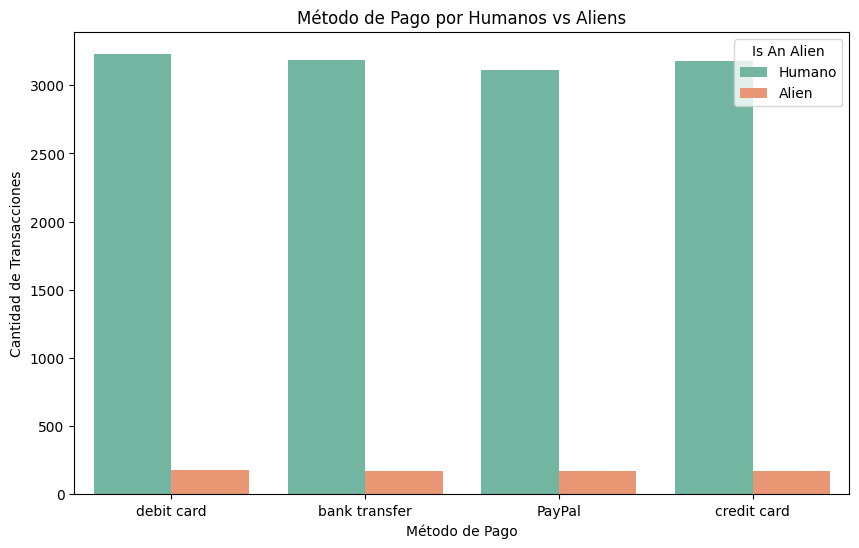

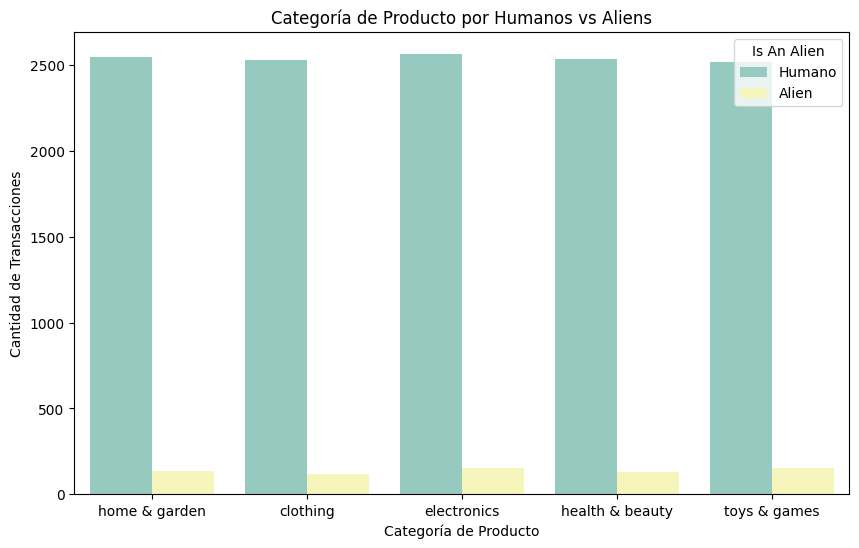

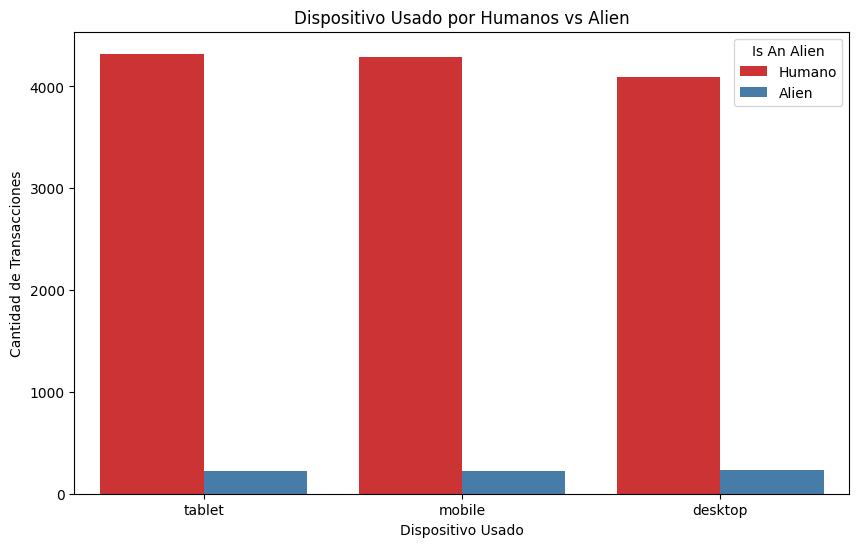

In [45]:
# Variables categoricas (Payment Method, Product Category, Device Used)


# Payment Method diferenciado entre humanos y aliens
plt.figure(figsize=(10,6))
sns.countplot(data=df_pandas, x="Payment Method", hue="Is An Alien", palette="Set2")
plt.title("Método de Pago por Humanos vs Aliens")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Is An Alien", labels=["Humano", "Alien"])
plt.show()

# Product Category
plt.figure(figsize=(10,6))
sns.countplot(data=df_pandas, x="Product Category", hue="Is An Alien", palette="Set3")
plt.title("Categoría de Producto por Humanos vs Aliens")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Is An Alien", labels=["Humano", "Alien"])
plt.show()

# Device Used
plt.figure(figsize=(10,6))
sns.countplot(data=df_pandas, x="Device Used", hue="Is An Alien", palette="Set1")
plt.title("Dispositivo Usado por Humanos vs Alien")
plt.xlabel("Dispositivo Usado")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Is An Alien", labels=["Humano", "Alien"])
plt.show()



> En el grafico de metodo de pago se puede observar que los humanos y los aliens prefieren los mismos metodos de pago, pero los humanos al ser mayor en cantidad realizan muchas mas transacciones.
> En el grafico de categoria de producto se observa que es similar entre aliens y humanos, pero al igual que el anterior, los humanos compran muchas mas cantidades pero principalmente en las mismas categorias
> En el grafico de dispositivo usado, se observa que los aliens muestran una proporcion mucho mas pequena en los dispositivos que usan

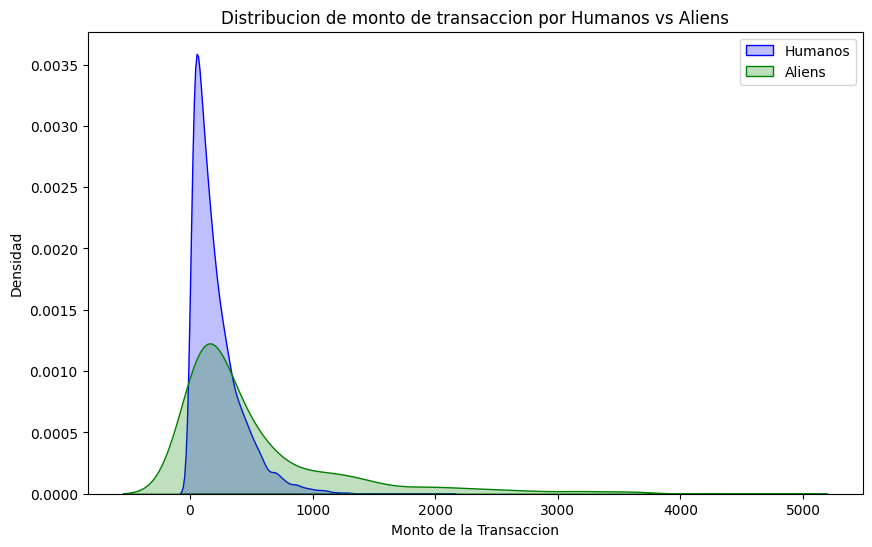

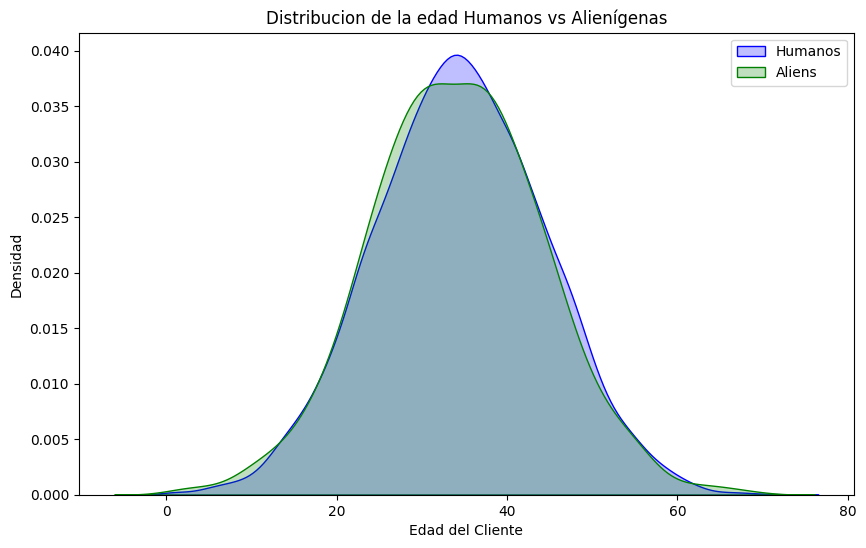

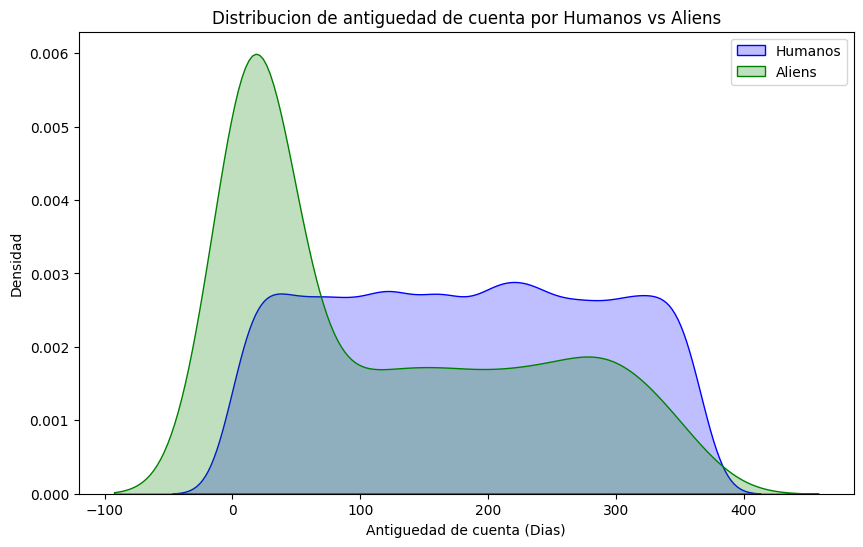

In [46]:
# Variables numericas (Transaction Amount, Customer Age, Account Age Days)

# Transaction Amount
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_pandas[df_pandas["Is An Alien"] == 0], x="Transaction Amount", fill=True, label="Humanos", color="blue")
sns.kdeplot(data=df_pandas[df_pandas["Is An Alien"] == 1], x="Transaction Amount", fill=True, label="Aliens", color="green")
plt.title("Distribucion de monto de transaccion por Humanos vs Aliens")
plt.xlabel("Monto de la Transaccion")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Customer Age
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_pandas[df_pandas["Is An Alien"] == 0], x="Customer Age", fill=True, label="Humanos", color="blue")
sns.kdeplot(data=df_pandas[df_pandas["Is An Alien"] == 1], x="Customer Age", fill=True, label="Aliens", color="green")
plt.title("Distribucion de la edad Humanos vs Alienígenas")
plt.xlabel("Edad del Cliente")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Account Age Days
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_pandas[df_pandas["Is An Alien"] == 0], x="Account Age Days", fill=True, label="Humanos", color="blue")
sns.kdeplot(data=df_pandas[df_pandas["Is An Alien"] == 1], x="Account Age Days", fill=True, label="Aliens", color="green")
plt.title("Distribucion de antiguedad de cuenta por Humanos vs Aliens")
plt.xlabel("Antiguedad de cuenta (Dias)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


> En el grafico del monto de la transaccion, se observa que la mayoria e las transacciones de humanos tienen montos bajos, y la distribucion disminuye a medida que el monto aumenta. En cambio, los aliens tambien tienen transacciones con montos bajos, pero estan mas concentrados en montos mucho menores en comparacion a los humanos
> En el grafico de la edad, las distribuciones son bastante similares, pero se podria decir que los aliens estan mas concentrados en edades menores.
> En el grafico de la antiguedad, los aliens tienen cuentas muy recientes, con menos de 50 dias de antiguedad. En cambio los humanos tienen una distribucion mucho mas uniforme

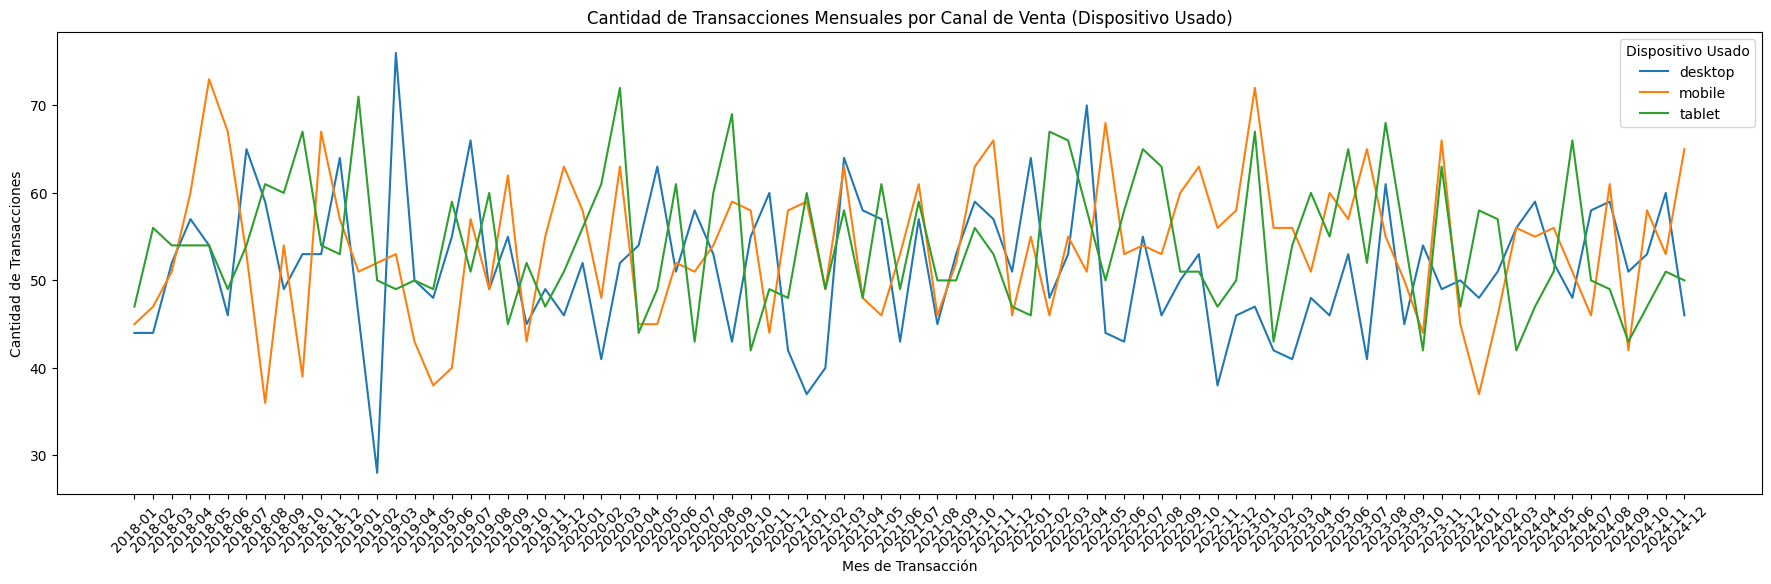

In [51]:
# Analisis de patrones de las transacciones
# cantidad de transacciones mensuales por canal de venta

df_pandas["Transaction Date"] = pd.to_datetime(df_pandas["Transaction Date"])
df_pandas["Transaction Month"] = df_pandas["Transaction Date"].dt.to_period("M").astype(str)

df_monthly_transactions = df_pandas.groupby(["Transaction Month", "Device Used"]).size().reset_index(name='Transaction Count')

plt.figure(figsize=(22,6))
sns.lineplot(data=df_monthly_transactions, x="Transaction Month", y="Transaction Count", hue="Device Used", errorbar=None)
plt.title("Cantidad de Transacciones Mensuales por Canal de Venta (Dispositivo Usado)")
plt.xlabel("Mes de Transacción")
plt.ylabel("Cantidad de Transacciones")
plt.xticks(rotation=45)
plt.legend(title="Dispositivo Usado")
plt.show()



> En el grafico se observa que a lo largo del tiempo, las transacciones varian de manera significativa entre dispositivos. Mobile tiene unas curvas un poco mas consistentes en comparaacion a tablet y desktop, que poseen patrones mucho mas irregulares. No se observa ningun patron estacional, pero si hay muchos cambios al variar el mes.

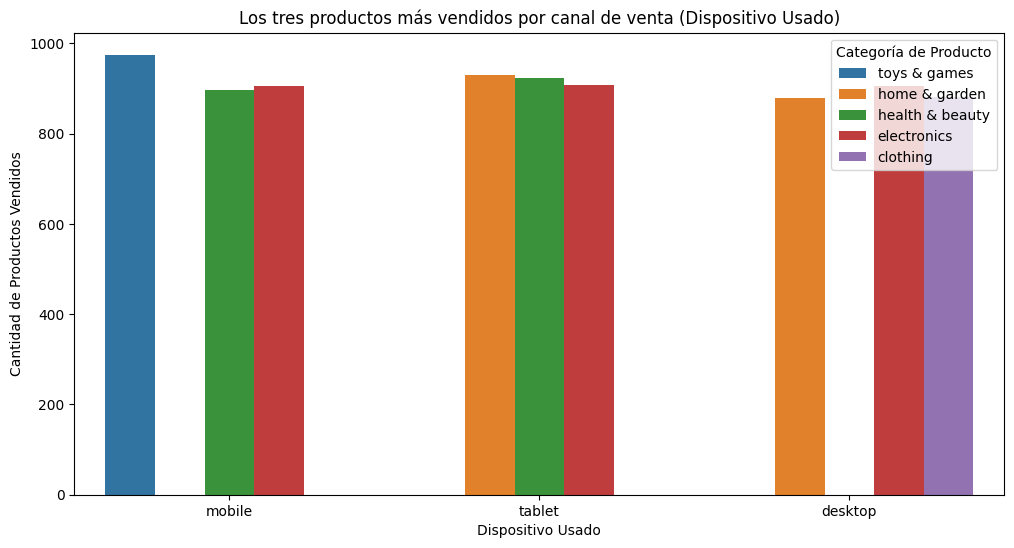

In [52]:
# tres productos mas vendidos por canal

top_3_products = df_pandas.groupby(["Device Used", "Product Category"]).size().reset_index(name='counts')
top_3_products = top_3_products.sort_values(by='counts', ascending=False).groupby("Device Used").head(3)

# Gráfico de barras apiladas que muestra los tres productos más vendidos por canal de venta
plt.figure(figsize=(12,6))
sns.barplot(data=top_3_products, x="Device Used", y="counts", hue="Product Category")
plt.title("Los tres productos más vendidos por canal de venta (Dispositivo Usado)")
plt.xlabel("Dispositivo Usado")
plt.ylabel("Cantidad de Productos Vendidos")
plt.legend(title="Categoría de Producto")
plt.show()


>  En el grafico se observa que los productos mas vendidos por mobile son juguetes y juegos, mientras que tablet posee sus categorias mas equilibradas. Por ultimo, los productos mas vendidos con desktop son hogar y jardin, electronicos y ropa.Lo cual es interesante ya que solo en esta categoria la ropa tiene ventas, por lo que los clientes prefieren ver por computador la ropa que desean comprar.

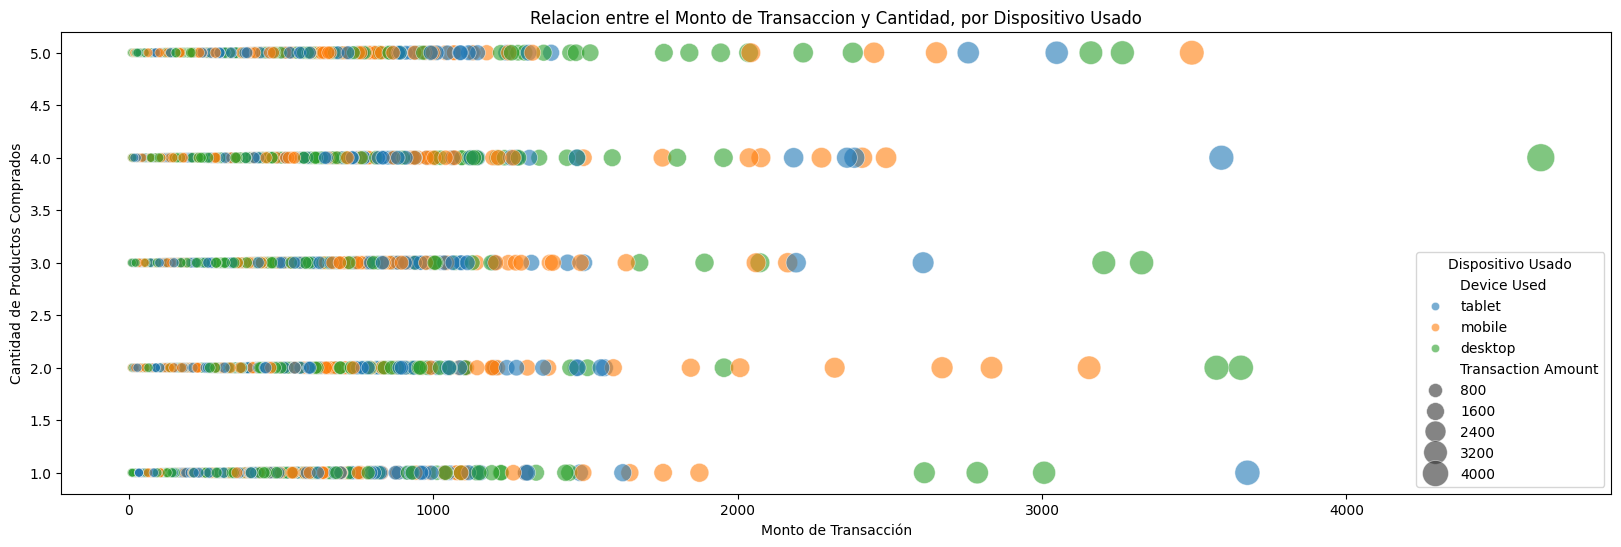

In [54]:
# relacion entre monto de transaccion y cantidad de productos adquiridos
plt.figure(figsize=(20,6))
sns.scatterplot(data=df_pandas, x="Transaction Amount", y="Quantity", hue="Device Used", size="Transaction Amount", sizes=(40, 400), alpha=0.6)
plt.title("Relacion entre el Monto de Transaccion y Cantidad, por Dispositivo Usado")
plt.xlabel("Monto de Transacción")
plt.ylabel("Cantidad de Productos Comprados")
plt.legend(title="Dispositivo Usado")
plt.show()



> En el grafico se muestra la relacion del monto de la transaccion y la cantidad de productos comprados, diferenciandolos por dispositivo utilizado. El tamaño de los puntos representa el monto de la transaccion. Se puede observar que la mayoria de las transacciones son de 1 y 3 productos, con montos de transaccion mas bajos en torno a los 1000 o menos. En cambio, las transacciones de un monto mayor, donde los puntos son mas grandes, hay una cantidad mas alta de productos, de 4 a 5, y los dispositivos utilizados estan distribuidos de manera similar entre transacciones.



### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [61]:
df1.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)
 |-- Transaction bp: double (nullable = true)
 |-- Transaction Month: integer (nullable = true)
 |-- Type of purchase: string (nullable = false)



In [67]:
cols_to_cast = {"Transaction Month": StringType()
                }
df2 = cast_columns(df1, cols_to_cast)
df2.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)
 |-- Transaction bp: double (nullable = true)
 |-- Transaction Month: string (nullable = true)
 |-- Type of purchase: string (nullable = false)



In [84]:
df2.count()

13388

In [86]:
# tabla particionada
df2 = df2.withColumnRenamed("Payment Method", "Payment_Method")
df2.createOrReplaceTempView("transacciones")

sparksession.sql("""
CREATE TABLE IF NOT EXISTS transacciones_particionadas
USING PARQUET
PARTITIONED BY (Payment_Method)
AS SELECT * FROM transacciones
""")

DataFrame[]

In [87]:
sparksession.sql("SHOW PARTITIONS transacciones_particionadas").show()

+--------------------+
|           partition|
+--------------------+
|Payment_Method=Pa...|
|Payment_Method=ba...|
|Payment_Method=cr...|
|Payment_Method=de...|
+--------------------+



> Justificacion

decidimos usar los metodos de pago como particion, ya que las consultas suelen agruparse o filtrarse por método de pago, particionar por esta columna puede ayudar a mejorar el rendimiento.

In [89]:
sparksession.sql("SELECT COUNT(*) FROM transacciones_particionadas").show()

+--------+
|count(1)|
+--------+
|   13388|
+--------+



In [91]:
# 2

top_10_customers = sparksession.sql("""
SELECT `Customer ID`, SUM(Quantity) AS Total_Products
FROM transacciones_particionadas
GROUP BY `Customer ID`
ORDER BY Total_Products DESC
LIMIT 10
""")

# Mostrar los resultados
top_10_customers.show()


+--------------------+--------------+
|         Customer ID|Total_Products|
+--------------------+--------------+
|447b6447-464c-400...|           5.0|
|a76f00f5-8493-41b...|           5.0|
|6def79d9-fb71-415...|           5.0|
|aa8c72f5-fbcc-4bf...|           5.0|
|1718476e-0518-41b...|           5.0|
|ebf10b43-2999-4fa...|           5.0|
|62b1ce0c-5495-43e...|           5.0|
|e91ebafd-1925-400...|           5.0|
|2f3d5b31-bd85-4d7...|           5.0|
|6300f942-b86d-433...|           5.0|
+--------------------+--------------+



In [92]:
# 3
from pyspark.sql import Window
from pyspark.sql.functions import col, max as max_, current_date, date_sub

# ultimos 3 meses
df_filtered = df1.filter(col("Transaction Date") >= date_sub(current_date(), 90))

# ventana por customer id
windowSpec = Window.partitionBy("Customer ID")

# compra mas alta
df_result = df_filtered.withColumn("Max_Transaction_Amount", max_("Transaction Amount").over(windowSpec))

df_result.select("Customer ID", "Max_Transaction_Amount", "Transaction Date").show()


+--------------------+----------------------+-------------------+
|         Customer ID|Max_Transaction_Amount|   Transaction Date|
+--------------------+----------------------+-------------------+
|0084aeb6-6bc7-4f8...|                265.09|2024-11-20 00:00:00|
|00dba4f3-102b-4d8...|                 80.76|2024-08-02 00:00:00|
|011ba8d6-6dcd-4cf...|                218.64|2024-10-20 00:00:00|
|014817a0-2f4f-477...|                289.72|2024-12-17 00:00:00|
|014da57c-a59c-465...|                 33.22|2024-08-21 00:00:00|
|01754c8a-c873-49e...|                267.89|2024-12-05 00:00:00|
|0178fe5b-e055-4ec...|                723.04|2024-06-15 00:00:00|
|01ac1427-4acc-410...|                234.43|2024-06-15 00:00:00|
|01feca2f-2907-445...|                 48.71|2024-10-17 00:00:00|
|03557036-602b-4f5...|                  29.8|2024-12-17 00:00:00|
|03c61a84-77db-4aa...|                269.66|2024-08-29 00:00:00|
|0464bbaa-d5e0-41c...|                425.34|2024-07-29 00:00:00|
|04c9816c-

> Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas

la funcion de la ventana (window) permite hacr calculos en grupos de datos definidos por una ventana, que es lo mismo que las ventanas de SQL. Para hacerlo en Pyspark, como ya ofrece un soporte nativo para funciones SQL, se pueden manejar las consultas de manera mycho mas flexible y rapida, puees en Spark se manejan las operaciones a gran escala de manera mas eficiente


### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [93]:
import pickle
import requests

In [94]:
# Código Aquí

# https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl"
response = requests.get(url)
with open("object.pkl", "wb") as f:
    f.write(response.content)

with open("object.pkl", "rb") as f:
    model = pickle.load(f)

print(type(model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


> A ver el tipo de objeto se puede deducir que es un modelo de regresion, especificamente un LogisticRegression de la libreria scikit-learn. Con este, se podrian predecir las probabilidades de fraude

In [95]:
print(dir(model))
help(model)


['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

> se puede observar que el metodo para predecir es el predict_proba, en donde el ultimo valor de la lista que devuelve sera la probabilidad de que sea fraude

In [96]:
def predict_fraud(transaction_amount, quantity, customer_age, transaction_hour):

    features = [[transaction_amount, quantity, customer_age, transaction_hour]]
    prediction = model.predict_proba(features)

    #ultimo valor de la lista
    return float(prediction[0][1])  # [0][1] es la probabilidad de fraude

In [97]:
from pyspark.sql.functions import udf

udf_predict_fraud = udf(predict_fraud, FloatType())

In [99]:
df2 = df2.withColumn("prediction", udf_predict_fraud(
    df2["Transaction Amount"], df2["Quantity"], df2["Customer Age"], df2["Transaction Hour"]
))

# Mostrar el resultado
df2.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+-----------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment_Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction_Month|Type of purchase| prediction|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+--

> beneficios de udf: este permite usar una logica personalizada en un entorno distribuido, por lo que mejora el rendimiento para procesar grandes volumenes de datos en multiples nodos de un cluster